In [25]:
import requests
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import itertools
import warnings
import datetime
# Import the statsmodels library for using SARIMAX model
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

warnings.filterwarnings("ignore") # specify to ignore warning messages

In [50]:
# for nyeri & monnthly
data = requests.get('https://power.larc.nasa.gov/cgi-bin/v1/DataAccess.py?&request=execute&identifier=SinglePoint&parameters=PRECTOT,\
T2M,WS2M&startDate=2015&endDate=2019&userCommunity=AG&tempAverage=INTERANNUAL&outputList=CSV&lat=-0.4255&lon=36.9592')

In [ ]:
# Webscarpping
main_url = 'https://power.larc.nasa.gov/cgi-bin/v1/DataAccess.py?&request=execute&identifier=SinglePoint&parameters=PRECTOT,T2M,WS2M&startDate=20200101&endDate=20210728&userCommunity=AG&tempAverage=DAILY&outputList=CSV&lat=-0.5821&lon=37.1556'

In [51]:
data

<Response [200]>

In [52]:
content = data.content.decode('utf-8')
content

'{\n "features": [\n  {\n   "geometry": {\n    "coordinates": [\n     36.95921,\n     -0.42549,\n     2062.88\n    ],\n    "type": "Point"\n   },\n   "properties": {\n    "parameter": {\n     "PRECTOT": {\n      "201501": 26.62,\n      "201502": 39.78,\n      "201503": 87.2,\n      "201504": 288.36,\n      "201505": 152.58,\n      "201506": 59.1,\n      "201507": 60.81,\n      "201508": 44.43,\n      "201509": 32.06,\n      "201510": 163.54,\n      "201511": 262.53,\n      "201512": 154.77,\n      "201513": 1371.8,\n      "201601": 109.8,\n      "201602": 26.64,\n      "201603": 82.48,\n      "201604": 270.5,\n      "201605": 151.75,\n      "201606": 74.05,\n      "201607": 46.28,\n      "201608": 59.3,\n      "201609": 47.75,\n      "201610": 43.46,\n      "201611": 223.42,\n      "201612": 28.7,\n      "201613": 1164.12,\n      "201701": 20.68,\n      "201702": 54.51,\n      "201703": 39.96,\n      "201704": 185.35,\n      "201705": 190.11,\n      "201706": 43.82,\n      "201707": 10

In [53]:
json_data = json.loads(content)

In [54]:
json_data_str = json.dumps(json_data)
print(json_data)

{'features': [{'geometry': {'coordinates': [36.95921, -0.42549, 2062.88], 'type': 'Point'}, 'properties': {'parameter': {'PRECTOT': {'201501': 26.62, '201502': 39.78, '201503': 87.2, '201504': 288.36, '201505': 152.58, '201506': 59.1, '201507': 60.81, '201508': 44.43, '201509': 32.06, '201510': 163.54, '201511': 262.53, '201512': 154.77, '201513': 1371.8, '201601': 109.8, '201602': 26.64, '201603': 82.48, '201604': 270.5, '201605': 151.75, '201606': 74.05, '201607': 46.28, '201608': 59.3, '201609': 47.75, '201610': 43.46, '201611': 223.42, '201612': 28.7, '201613': 1164.12, '201701': 20.68, '201702': 54.51, '201703': 39.96, '201704': 185.35, '201705': 190.11, '201706': 43.82, '201707': 104.94, '201708': 98.42, '201709': 117.26, '201710': 200.06, '201711': 204.14, '201712': 44.05, '201713': 1303.31, '201801': 0.68, '201802': 0.85, '201803': 9.78, '201804': 19.01, '201805': 8.88, '201806': 4.53, '201807': 2.0, '201808': 2.18, '201809': 1.34, '201810': 2.71, '201811': 3.38, '201812': 4.28

In [55]:
features = json_data['features']
features

[{'geometry': {'coordinates': [36.95921, -0.42549, 2062.88], 'type': 'Point'},
  'properties': {'parameter': {'PRECTOT': {'201501': 26.62,
     '201502': 39.78,
     '201503': 87.2,
     '201504': 288.36,
     '201505': 152.58,
     '201506': 59.1,
     '201507': 60.81,
     '201508': 44.43,
     '201509': 32.06,
     '201510': 163.54,
     '201511': 262.53,
     '201512': 154.77,
     '201513': 1371.8,
     '201601': 109.8,
     '201602': 26.64,
     '201603': 82.48,
     '201604': 270.5,
     '201605': 151.75,
     '201606': 74.05,
     '201607': 46.28,
     '201608': 59.3,
     '201609': 47.75,
     '201610': 43.46,
     '201611': 223.42,
     '201612': 28.7,
     '201613': 1164.12,
     '201701': 20.68,
     '201702': 54.51,
     '201703': 39.96,
     '201704': 185.35,
     '201705': 190.11,
     '201706': 43.82,
     '201707': 104.94,
     '201708': 98.42,
     '201709': 117.26,
     '201710': 200.06,
     '201711': 204.14,
     '201712': 44.05,
     '201713': 1303.31,
     '20180

In [56]:
features = features[0]
features

{'geometry': {'coordinates': [36.95921, -0.42549, 2062.88], 'type': 'Point'},
 'properties': {'parameter': {'PRECTOT': {'201501': 26.62,
    '201502': 39.78,
    '201503': 87.2,
    '201504': 288.36,
    '201505': 152.58,
    '201506': 59.1,
    '201507': 60.81,
    '201508': 44.43,
    '201509': 32.06,
    '201510': 163.54,
    '201511': 262.53,
    '201512': 154.77,
    '201513': 1371.8,
    '201601': 109.8,
    '201602': 26.64,
    '201603': 82.48,
    '201604': 270.5,
    '201605': 151.75,
    '201606': 74.05,
    '201607': 46.28,
    '201608': 59.3,
    '201609': 47.75,
    '201610': 43.46,
    '201611': 223.42,
    '201612': 28.7,
    '201613': 1164.12,
    '201701': 20.68,
    '201702': 54.51,
    '201703': 39.96,
    '201704': 185.35,
    '201705': 190.11,
    '201706': 43.82,
    '201707': 104.94,
    '201708': 98.42,
    '201709': 117.26,
    '201710': 200.06,
    '201711': 204.14,
    '201712': 44.05,
    '201713': 1303.31,
    '201801': 0.68,
    '201802': 0.85,
    '201803

In [57]:
properties = features['properties']
properties

{'parameter': {'PRECTOT': {'201501': 26.62,
   '201502': 39.78,
   '201503': 87.2,
   '201504': 288.36,
   '201505': 152.58,
   '201506': 59.1,
   '201507': 60.81,
   '201508': 44.43,
   '201509': 32.06,
   '201510': 163.54,
   '201511': 262.53,
   '201512': 154.77,
   '201513': 1371.8,
   '201601': 109.8,
   '201602': 26.64,
   '201603': 82.48,
   '201604': 270.5,
   '201605': 151.75,
   '201606': 74.05,
   '201607': 46.28,
   '201608': 59.3,
   '201609': 47.75,
   '201610': 43.46,
   '201611': 223.42,
   '201612': 28.7,
   '201613': 1164.12,
   '201701': 20.68,
   '201702': 54.51,
   '201703': 39.96,
   '201704': 185.35,
   '201705': 190.11,
   '201706': 43.82,
   '201707': 104.94,
   '201708': 98.42,
   '201709': 117.26,
   '201710': 200.06,
   '201711': 204.14,
   '201712': 44.05,
   '201713': 1303.31,
   '201801': 0.68,
   '201802': 0.85,
   '201803': 9.78,
   '201804': 19.01,
   '201805': 8.88,
   '201806': 4.53,
   '201807': 2.0,
   '201808': 2.18,
   '201809': 1.34,
   '201810'

In [58]:
parameters = properties['parameter']
parameters

{'PRECTOT': {'201501': 26.62,
  '201502': 39.78,
  '201503': 87.2,
  '201504': 288.36,
  '201505': 152.58,
  '201506': 59.1,
  '201507': 60.81,
  '201508': 44.43,
  '201509': 32.06,
  '201510': 163.54,
  '201511': 262.53,
  '201512': 154.77,
  '201513': 1371.8,
  '201601': 109.8,
  '201602': 26.64,
  '201603': 82.48,
  '201604': 270.5,
  '201605': 151.75,
  '201606': 74.05,
  '201607': 46.28,
  '201608': 59.3,
  '201609': 47.75,
  '201610': 43.46,
  '201611': 223.42,
  '201612': 28.7,
  '201613': 1164.12,
  '201701': 20.68,
  '201702': 54.51,
  '201703': 39.96,
  '201704': 185.35,
  '201705': 190.11,
  '201706': 43.82,
  '201707': 104.94,
  '201708': 98.42,
  '201709': 117.26,
  '201710': 200.06,
  '201711': 204.14,
  '201712': 44.05,
  '201713': 1303.31,
  '201801': 0.68,
  '201802': 0.85,
  '201803': 9.78,
  '201804': 19.01,
  '201805': 8.88,
  '201806': 4.53,
  '201807': 2.0,
  '201808': 2.18,
  '201809': 1.34,
  '201810': 2.71,
  '201811': 3.38,
  '201812': 4.28,
  '201813': 4.98,


In [59]:
PRECTOT = parameters['PRECTOT']
PRECTOT

{'201501': 26.62,
 '201502': 39.78,
 '201503': 87.2,
 '201504': 288.36,
 '201505': 152.58,
 '201506': 59.1,
 '201507': 60.81,
 '201508': 44.43,
 '201509': 32.06,
 '201510': 163.54,
 '201511': 262.53,
 '201512': 154.77,
 '201513': 1371.8,
 '201601': 109.8,
 '201602': 26.64,
 '201603': 82.48,
 '201604': 270.5,
 '201605': 151.75,
 '201606': 74.05,
 '201607': 46.28,
 '201608': 59.3,
 '201609': 47.75,
 '201610': 43.46,
 '201611': 223.42,
 '201612': 28.7,
 '201613': 1164.12,
 '201701': 20.68,
 '201702': 54.51,
 '201703': 39.96,
 '201704': 185.35,
 '201705': 190.11,
 '201706': 43.82,
 '201707': 104.94,
 '201708': 98.42,
 '201709': 117.26,
 '201710': 200.06,
 '201711': 204.14,
 '201712': 44.05,
 '201713': 1303.31,
 '201801': 0.68,
 '201802': 0.85,
 '201803': 9.78,
 '201804': 19.01,
 '201805': 8.88,
 '201806': 4.53,
 '201807': 2.0,
 '201808': 2.18,
 '201809': 1.34,
 '201810': 2.71,
 '201811': 3.38,
 '201812': 4.28,
 '201813': 4.98,
 '201901': 1.05,
 '201902': 0.42,
 '201903': 1.08,
 '201904': 2

In [60]:
T2M = parameters['T2M']
T2M

{'201501': 17.52,
 '201502': 19.02,
 '201503': 18.66,
 '201504': 17.95,
 '201505': 17.17,
 '201506': 16.91,
 '201507': 16.28,
 '201508': 16.65,
 '201509': 17.7,
 '201510': 17.96,
 '201511': 17.23,
 '201512': 16.77,
 '201513': 17.47,
 '201601': 17.15,
 '201602': 17.66,
 '201603': 18.95,
 '201604': 18.38,
 '201605': 16.93,
 '201606': 16.12,
 '201607': 15.66,
 '201608': 15.79,
 '201609': 16.85,
 '201610': 17.64,
 '201611': 17.03,
 '201612': 16.64,
 '201613': 17.06,
 '201701': 17.13,
 '201702': 18.09,
 '201703': 19.41,
 '201704': 18.39,
 '201705': 17.1,
 '201706': 16.95,
 '201707': 16.42,
 '201708': 16.34,
 '201709': 16.85,
 '201710': 17.45,
 '201711': 16.54,
 '201712': 16.3,
 '201713': 17.24,
 '201801': 16.94,
 '201802': 17.96,
 '201803': 17.02,
 '201804': 16.7,
 '201805': 16.23,
 '201806': 15.35,
 '201807': 14.58,
 '201808': 14.95,
 '201809': 15.94,
 '201810': 16.67,
 '201811': 17.06,
 '201812': 16.6,
 '201813': 16.32,
 '201901': 16.84,
 '201902': 17.91,
 '201903': 19.25,
 '201904': 19.5

In [61]:
WS2M = parameters['WS2M']
WS2M

{'201501': 2.01,
 '201502': 2.27,
 '201503': 2.92,
 '201504': 1.84,
 '201505': 2.19,
 '201506': 1.38,
 '201507': 2.01,
 '201508': 2.2,
 '201509': 2.28,
 '201510': 2.48,
 '201511': 2.06,
 '201512': 1.84,
 '201513': 2.13,
 '201601': 1.79,
 '201602': 2.09,
 '201603': 2.24,
 '201604': 2.07,
 '201605': 1.64,
 '201606': 1.61,
 '201607': 1.46,
 '201608': 2.1,
 '201609': 1.95,
 '201610': 2.17,
 '201611': 2.23,
 '201612': 2.35,
 '201613': 1.97,
 '201701': 2.17,
 '201702': 2.51,
 '201703': 2.52,
 '201704': 2.69,
 '201705': 2.47,
 '201706': 2.18,
 '201707': 1.53,
 '201708': 1.96,
 '201709': 1.84,
 '201710': 2.05,
 '201711': 2.3,
 '201712': 2.17,
 '201713': 2.2,
 '201801': 1.69,
 '201802': 2.56,
 '201803': 1.97,
 '201804': 1.84,
 '201805': 2.03,
 '201806': 1.64,
 '201807': 1.97,
 '201808': 1.71,
 '201809': 2.4,
 '201810': 2.47,
 '201811': 2.52,
 '201812': 2.02,
 '201813': 2.06,
 '201901': 2.16,
 '201902': 2.41,
 '201903': 2.34,
 '201904': 2.34,
 '201905': 2.49,
 '201906': 1.29,
 '201907': 1.76,
 '

In [62]:
# for Embu 
# precipitation
# temperature at 2m 
# windspeed at 2m


In [63]:
def get_embu_data_from_2021():
    day_data_url = 'https://power.larc.nasa.gov/cgi-bin/v1/DataAccess.py?&request=execute&identifier=SinglePoint&parameters=PRECTOT,T2M,WS2M&startDate=20200101&endDate=20210728&userCommunity=AG&tempAverage=DAILY&outputList=CSV&lat=-0.5423&lon=37.4543'
    response = requests.get(day_data_url)
    day_data = response.content.decode('utf-8')
    day_data = json.loads(day_data)
    features = day_data['features']
    features = features[0]
    properties = features['properties']
    parameters = properties['parameter']
    precipitation = parameters['PRECTOT'] #
    temp = parameters['T2M']
    wind = parameters['WS2M']
    
    return (precipitation, temp, wind)






In [66]:
precipitation, temp, wind = get_embu_data_from_2021()
len(precipitation)

575

In [67]:
for key, value in precipitation.items():
    print(value)

0.22
2.31
1.93
0.36
1.65
1.48
3.29
5.18
2.26
0.59
0.12
0.86
12.27
10.53
4.55
1.45
1.19
0.22
0.08
0.05
0.03
0.05
0.67
1.92
12.1
11.86
5.55
4.96
5.02
2.45
4.56
19.8
3.76
2.57
1.03
0.96
0.49
0.11
0.32
0.2
0.0
0.0
0.14
3.06
1.59
9.21
1.71
0.6
1.03
1.36
0.44
0.22
0.77
0.83
0.09
0.58
4.08
2.33
0.37
0.57
6.38
3.64
1.1
3.41
1.39
2.03
0.9
5.19
2.12
0.52
0.73
1.06
1.31
1.24
0.08
0.37
1.93
2.73
3.01
2.45
0.72
0.84
0.06
1.38
4.83
11.63
9.42
10.34
17.15
1.51
2.71
1.77
1.4
3.08
0.28
1.95
11.01
1.53
1.44
2.37
0.86
0.84
2.43
1.89
1.84
6.32
10.23
15.36
16.6
12.3
21.53
42.46
12.12
45.81
57.2
12.95
4.85
4.92
13.5
12.39
5.42
1.38
2.08
1.45
1.95
2.43
3.9
3.07
0.98
2.56
10.74
4.74
4.17
6.13
2.08
6.96
1.66
0.11
0.25
0.87
0.94
0.54
0.58
0.2
0.45
0.27
1.09
0.67
0.74
2.33
0.44
0.4
0.43
0.82
0.9
0.4
0.12
1.21
5.47
6.39
0.95
1.62
1.88
18.16
5.91
6.58
2.01
2.12
0.63
0.18
0.54
6.12
12.25
3.31
1.96
3.5
1.36
1.25
0.91
0.37
0.63
0.03
0.51
0.4
0.72
0.3
1.51
2.35
1.49
0.73
2.31
0.53
0.2
0.31
2.98
0.87
0.77
1.39
0.45
0.3

In [84]:
def get_nyeri_data_from_2021():
    day_data_url = 'https://power.larc.nasa.gov/cgi-bin/v1/DataAccess.py?&request=execute&identifier=SinglePoint&parameters=PRECTOT,T2M,WS2M&startDate=20200101&endDate=20210725&userCommunity=AG&tempAverage=DAILY&outputList=CSV&lat=-0.4371&lon=36.9580'
    response = requests.get(day_data_url)
    day_data = response.content.decode('utf-8')
    day_data = json.loads(day_data)
    features = day_data['features']
    features = features[0]
    properties = features['properties']
    parameters = properties['parameter']
    precipitation = parameters['PRECTOT'] #
    temp = parameters['T2M']
    wind = parameters['WS2M']
    
    return (precipitation, temp, wind)






In [85]:
precipitation, temp, wind = get_nyeri_data_from_2021()
len(precipitation)

572

In [86]:
dates = []
temp_values = []
predipitation_values = []
wind_values = []
for key, value in precipitation.items():
    dates.append(key)
    predipitation_values.append(value)
for key, value in temp.items():
    temp_values.append(value)
    
for key, value in wind.items():
    wind_values.append(value)
    
print(predipitation_values[0:5])

[0.66, 3.65, 3.26, 0.64, 3.35]


In [87]:
nyeri_df = pd.DataFrame()
nyeri_df['datetime'] = dates
nyeri_df['precipitation'] = predipitation_values
nyeri_df['temp'] = temp_values
nyeri_df['wind'] = wind_values

In [77]:
def get_nanyuki_data_from_2021():
    day_data_url = 'https://power.larc.nasa.gov/cgi-bin/v1/DataAccess.py?&request=execute&identifier=SinglePoint&parameters=PRECTOT,T2M,WS2M&startDate=20200101&endDate=20210725&userCommunity=AG&tempAverage=DAILY&outputList=CSV&lat=0.0074&lon=37.0722'
    response = requests.get(day_data_url)
    day_data = response.content.decode('utf-8')
    day_data = json.loads(day_data)
    features = day_data['features']
    features = features[0]
    properties = features['properties']
    parameters = properties['parameter']
    precipitation = parameters['PRECTOT'] #
    temp = parameters['T2M']
    wind = parameters['WS2M']
    
    return (precipitation, temp, wind)






In [78]:
precipitation, temp, wind = get_nanyuki_data_from_2021()
len(precipitation)

572

In [79]:
for key, value in precipitation.items():
    print(value)

0.85
4.31
3.5
0.5
4.03
2.16
1.66
2.43
1.59
0.27
0.06
0.8
8.9
6.06
3.08
3.05
1.11
0.18
0.09
0.08
0.03
0.04
0.4
0.79
7.06
7.43
6.26
4.9
7.3
2.5
5.76
27.42
2.53
1.34
1.34
2.25
1.35
0.21
0.24
0.53
0.0
0.0
0.21
5.6
2.49
10.73
1.83
0.36
0.7
0.96
0.26
0.12
0.75
0.9
0.08
0.44
2.94
1.8
0.17
0.47
1.38
1.44
0.54
1.27
0.16
0.95
0.32
3.67
2.45
0.25
0.98
1.2
1.62
1.44
0.1
0.53
3.21
4.84
3.76
3.38
0.68
1.17
0.25
3.85
9.49
34.02
11.69
3.49
6.56
0.97
1.85
1.32
0.66
0.97
0.34
0.92
8.43
1.7
0.82
1.0
0.79
0.52
6.48
3.32
2.68
3.31
9.59
5.37
19.19
23.89
15.69
36.57
17.38
27.31
41.23
8.91
6.16
4.21
11.48
7.12
9.1
2.79
2.67
3.24
10.04
7.39
3.32
2.23
0.64
2.29
4.33
4.84
4.28
3.09
1.17
5.63
3.52
0.16
0.15
0.69
0.9
0.53
1.55
0.67
0.62
0.21
0.84
0.57
0.52
3.78
0.43
0.32
0.45
0.61
0.64
0.23
0.29
3.29
22.03
10.96
1.6
1.57
0.9
10.75
3.37
7.33
1.46
2.64
0.44
0.5
0.53
7.67
13.9
2.23
3.34
2.23
1.32
2.87
1.74
0.25
0.46
0.03
0.52
0.8
0.79
0.38
2.66
2.68
2.61
1.11
2.13
0.39
0.12
0.72
2.39
1.73
0.97
1.18
2.28
1.66
0.79
1.7

### Now Data Analysis

In [83]:
# useful links
# https://analyticsindiamag.com/comparing-arima-model-and-lstm-rnn-model-in-time-series-forecasting/

# reference link
# https://github.com/imkhoa99/Time-Series-Analysis-and-Weather-Forecast-/blob/master/Time_Series_Project.ipynb

In [ ]:
#  lets work with that of Nyeri now, 

In [88]:
# first 5 elements
nyeri_df.head()

,datetime,precipitation,temp,wind
0,20200101,0.66,15.59,1.88
1,20200102,3.65,15.87,2.33
2,20200103,3.26,16.09,2.39
3,20200104,0.64,15.58,2.39
4,20200105,3.35,16.12,1.51


In [89]:
# set data as index
nyeri_df.set_index('datetime', inplace=True) # Done once
nyeri_df.head()

,precipitation,temp,wind
datetime,,,
20200101,0.66,15.59,1.88
20200102,3.65,15.87,2.33
20200103,3.26,16.09,2.39
20200104,0.64,15.58,2.39
20200105,3.35,16.12,1.51


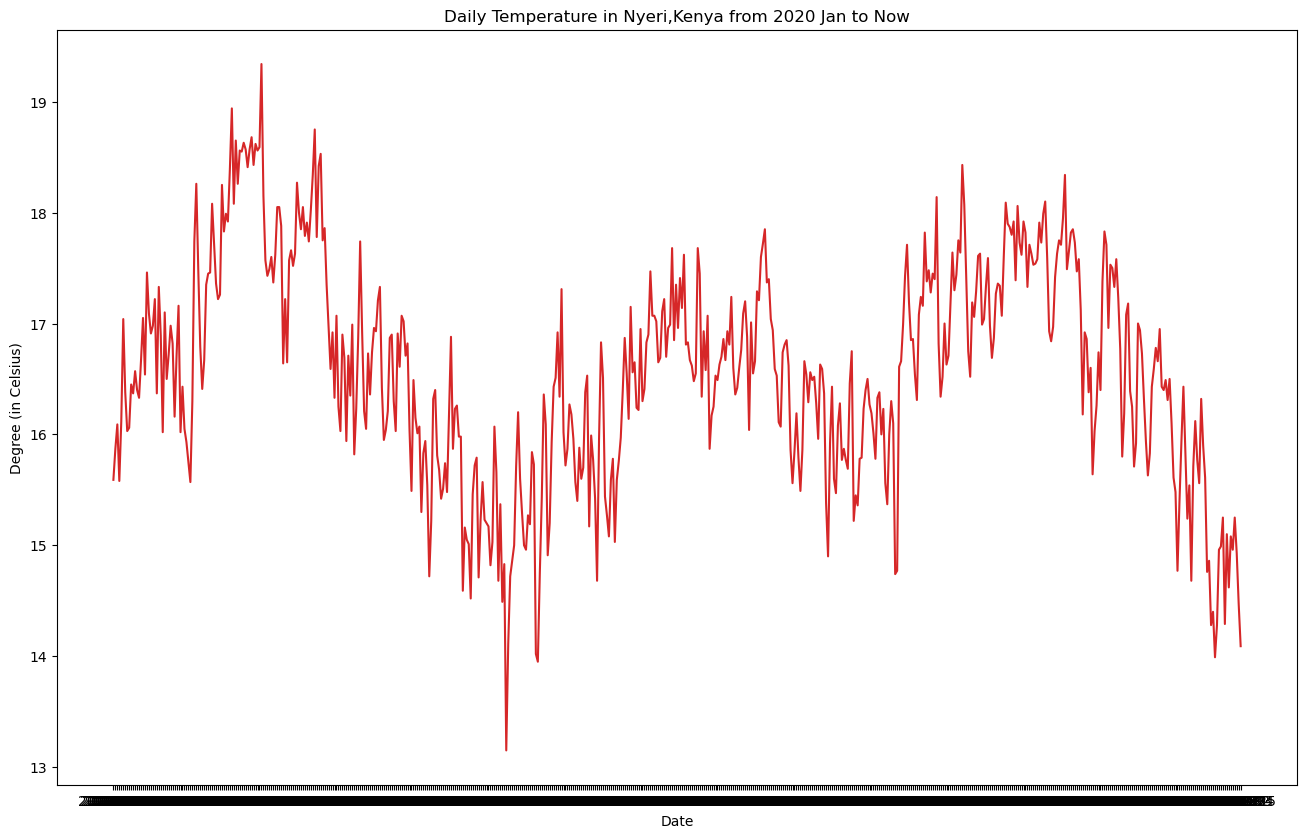

In [90]:
# Plot the daily temperature change 
plt.figure(figsize=(16,10), dpi=100)
plt.plot(nyeri_df.index,nyeri_df.temp, color='tab:red')
plt.gca().set(title="Daily Temperature in Nyeri,Kenya from 2020 Jan to Now", xlabel='Date', ylabel="Degree (in Celsius)")
plt.show()

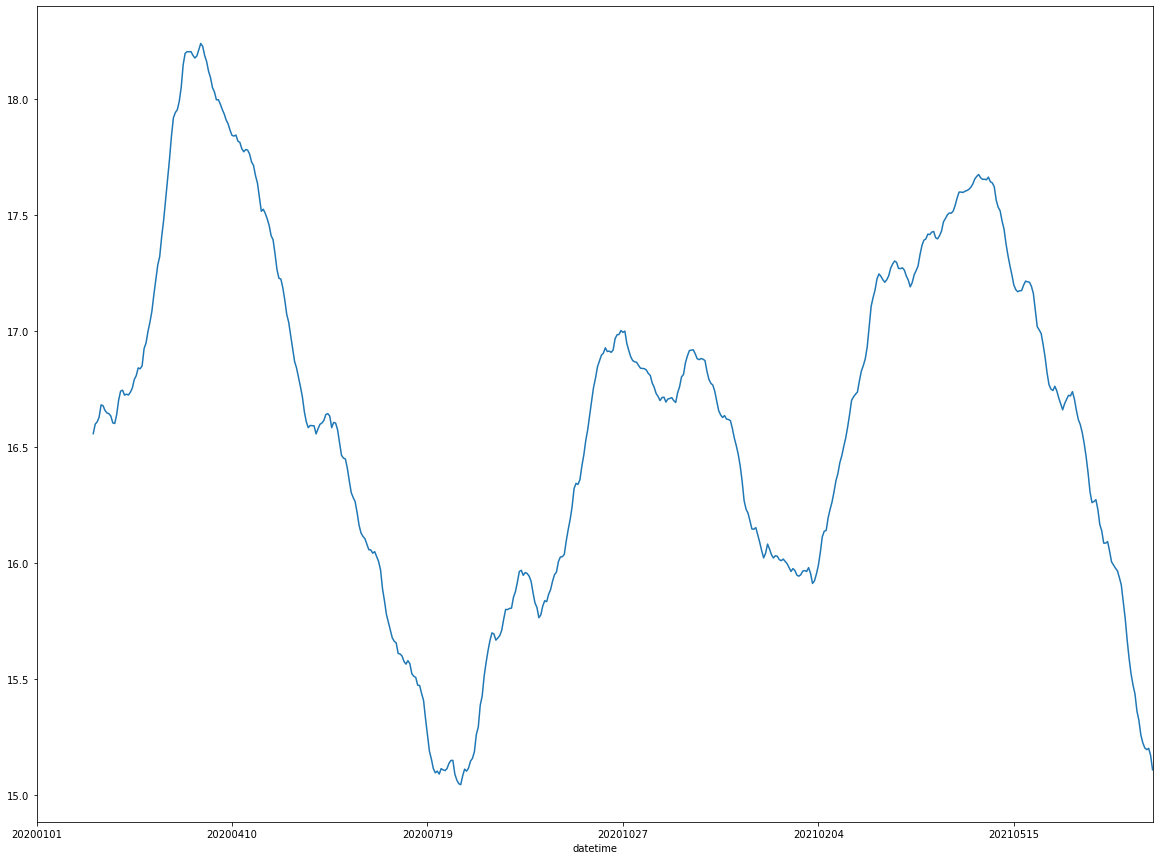

In [93]:
# Apply the Moving Average function by a subset of size 30 days.
temp_values =  nyeri_df.temp.rolling(window=30).mean()
temp_values.plot(figsize=(20,15))

In [14]:
#We can also visualize our data using a method called time-series decomposition that allows us 
#to decompose our time series into three distinct components: trend, seasonality, and noise.

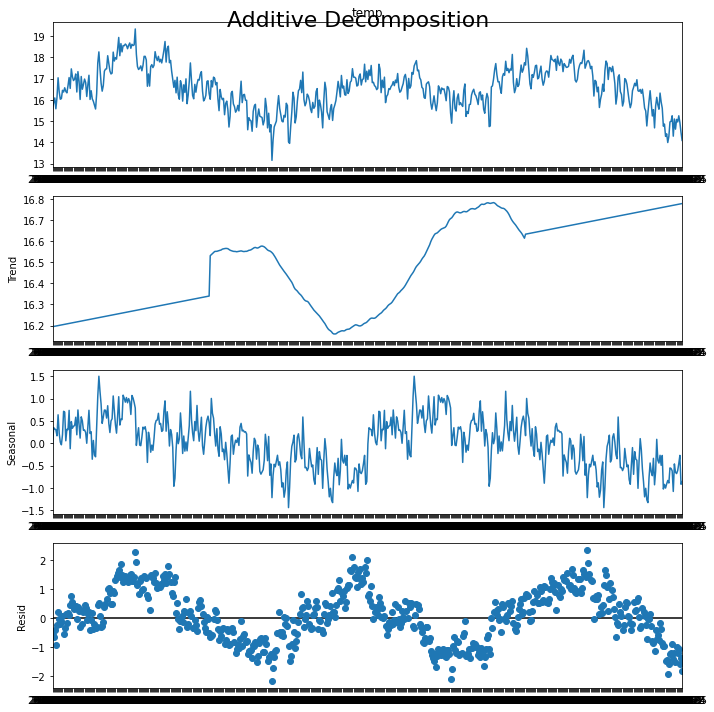

In [94]:
# Additive Decomposition
result_add = seasonal_decompose(nyeri_df.temp, model='additive', extrapolate_trend='freq', freq=286)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_add.plot().suptitle('Additive Decomposition', fontsize=22)
plt.show()

In [95]:
#would predict the weather based on an assumption: The air temperature today depends on the air temperature yesterday,
#the air temperature yesterday depends on the day before yesterday, and so on.

In [96]:

# Shift the current temperature to the next day. 
predicted_df = nyeri_df.temp.to_frame().shift(1).rename(columns = {"temp": "temp_pred" })
actual_df = nyeri_df.temp.to_frame().rename(columns = {"temp": "temp_actual" })

# Concatenate the actual and predicted temperature
one_step_df = pd.concat([actual_df,predicted_df],axis=1)

# Select from the second row, because there is no prediction for today due to shifting.
one_step_df = one_step_df[1:]
one_step_df.head(10)

,temp_actual,temp_pred
datetime,,
20200102,15.87,15.59
20200103,16.09,15.87
20200104,15.58,16.09
20200105,16.12,15.58
20200106,17.04,16.12
20200107,16.38,17.04
20200108,16.03,16.38
20200109,16.06,16.03
20200110,16.45,16.06


In [19]:
#We could validate how well our model is by looking at the Root Mean Squared Error(RMSE) between the predicted and actual temperature:

In [97]:
from sklearn.metrics import mean_squared_error as MSE
from math import sqrt

# Calculate the RMSE
temp_pred_err = MSE(one_step_df.temp_actual, one_step_df.temp_pred, squared=False)
print("The RMSE is", temp_pred_err)

The RMSE is 0.5167278836866988


### Weather Forecast using SARIMA model

#### We are going to apply one of the most commonly used method for time-series forecasting, known as SARIMA, which stands for Seasonal Autoregressive Integrated Moving Average. SARIMA models are denoted with the notation SARIMA(p,d,q)(P,D,Q,s). These three parameters account for seasonality, trend, and noise in data:

#### We will use a “grid search” to iteratively explore different combinations of parameters. For each combination of parameters, we fit a new seasonal SARIMA model with the SARIMAX() function from the statsmodels module and assess its overall quality.

In [106]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [107]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(one_step_df.temp_actual,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:4822.4291069092715
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:4026.125235914388
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1433.4051840007285
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1338.7212160794859
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1435.3167790692828
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1365.0684424132285
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1341.2414181496451
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1339.4355471791825
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:4056.1386476371335
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3313.2900223650477
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1214.7360727849657
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1083.3799322161487
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1218.0677647319803
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1106.3054311537726
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1099.6625718949813
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1086.8035302182152
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:866.9232722071749
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 -

In [108]:
# Fit the SARIMAX model using optimal parameters
mod = sm.tsa.statespace.SARIMAX(one_step_df.temp_actual,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

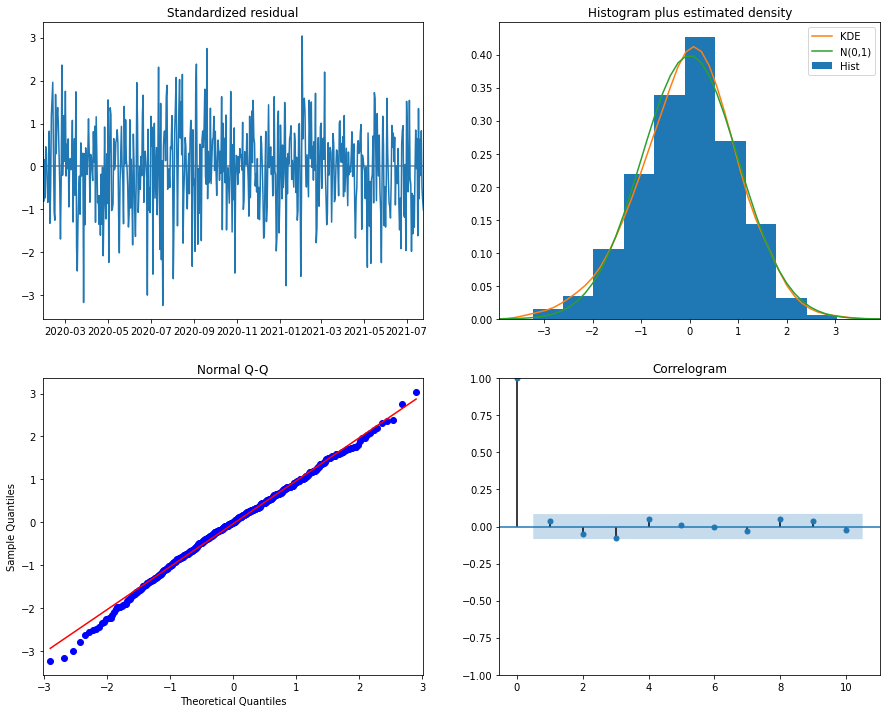

In [109]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [120]:
pred = results.get_prediction(start=pd.to_datetime('20210731'), dynamic=False)
pred_ci = pred.conf_int()

In [121]:
pred_ci

,lower temp_actual,upper temp_actual
2021-07-31,13.121255,15.907654


In [122]:
model_name = 'nyeri_sarima_weather'
model_pickle = 'nyeri_sarima_weather.pkl'
results.save(model_name, remove_data=False)
results.save(model_pickle, remove_data=False)

In [123]:
nyeri_sarima_weather = sm.load('nyeri_sarima_weather')

In [124]:
pred = nyeri_sarima_weather.get_prediction(start=pd.to_datetime('20210803'), dynamic=False)
pred_ci = pred.conf_int()
pred_ci

,lower temp_actual,upper temp_actual
2021-08-03,13.027526,15.998946


In [105]:
### Try One Hot Encoding